In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from scipy import interpolate
import pickle
import pandas as pd
import random
import seaborn as sns
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import tensorflow as tf
from model import main as model
from sepsis_data import data_process 

# Prepare data

### Download the data using the terminal: wget -r -N -c -np https://physionet.org/files/challenge-2019/1.0.0/training/
 
 
1. put the downloaded folder (named training) in directory sepsis_data, remove index.html in training_setA and training_setB. (The original folder training_setA and training_setB contain 5 samples for display. If you downloaded the data, please replace it)  
2. run data process code as below



In [3]:
#process data in training_setA
raw_data_dir = 'sepsis_data/training/training_setA' # raw data dirextory
processed_data_dir = 'sepsis_data/processed_data/training_setA' # processed data dirextory
data_process.data_process(raw_data_dir,processed_data_dir)

#process data in training_setB
raw_data_dir = 'sepsis_data/training/training_setB' # raw data dirextory
processed_data_dir = 'sepsis_data/processed_data/training_setB' # processed data dirextory
data_process.data_process(raw_data_dir,processed_data_dir)

[***] Complete check type.
[***] Complete convert process.
[***] Complete missing data interpolate.
[***] Complete check type.
[***] Complete convert process.
[***] Complete missing data interpolate.


# 1. test model 

### load test data. ( randomly extract from dataset)

In [4]:
data_test, label_test=model.load_valData(processed_data_dir)

## base model w/o RCE loss

Test data is loaded!
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model/save_model/base/save_model
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



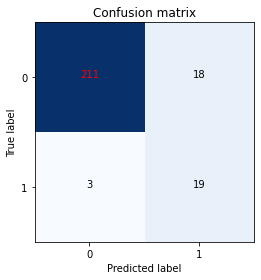

In [5]:

tf.reset_default_graph()
model.show_test(test_data=[data_test,label_test], model_type='base', model_path='model/save_model/base/save_model')


## model with RCE loss

Test data is loaded!
INFO:tensorflow:Restoring parameters from model/save_model/RCE/save_model


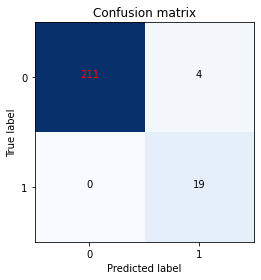

In [6]:

tf.reset_default_graph()
model.show_test(test_data=[data_test,label_test], model_type='RCE', model_path='model/save_model/RCE/save_model')


# 2. show results

## show model training process

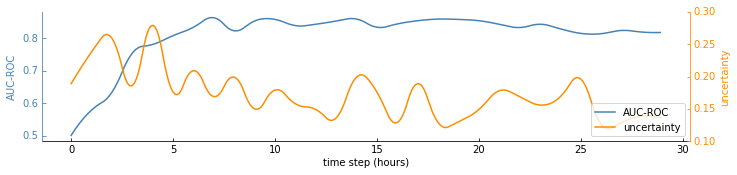

In [8]:
path_string = 'result/results/LossUncertainty.seqs'
with open(path_string,'rb') as f:
    result = pickle.load(f)
x=[x for x in range(30)]
func3 = interpolate.interp1d(x, result[0], kind='quadratic')
func4 = interpolate.interp1d(x, result[1], kind='quadratic')
x2=np.arange(0,29,0.1)
y2=func3(x2)
u2=func4(x2)
plt.figure(figsize=(10,2))
fig = plt.figure(1) 
ax_cof = HostAxes(fig, [0, 0, 0.9, 0.9])  

#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
#append axes
ax_cof.parasites.append(ax_temp)
#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_temp.axis['right'].set_visible(True)
ax_temp.axis['right'].major_ticklabels.set_visible(True)
ax_temp.axis['right'].label.set_visible(True)

#set label for axis
ax_cof.set_ylabel('AUC-ROC')
ax_cof.set_xlabel('time step (hours)')
ax_temp.set_ylabel('uncertainty')
fig.add_axes(ax_cof)

''' #set limit of x, y
ax_cof.set_xlim(0,2)
ax_cof.set_ylim(0,3)
'''
curve_cof = ax_cof.plot(x2, y2, label="AUC-ROC", color='steelblue')
curve_temp = ax_temp.plot(x2, u2, label="uncertainty", color='darkorange')

ax_temp.set_ylim(0.1,0.3)
ax_cof.legend()

ax_cof.axis['left'].label.set_color('steelblue')
ax_temp.axis['right'].label.set_color('darkorange')

ax_cof.axis['left'].major_ticks.set_color('steelblue')
ax_temp.axis['right'].major_ticks.set_color('darkorange')

ax_cof.axis['left'].major_ticklabels.set_color('steelblue')
ax_temp.axis['right'].major_ticklabels.set_color('darkorange')

ax_cof.axis['left'].line.set_color('steelblue')
ax_temp.axis['right'].line.set_color('darkorange')

plt.show()

## show results

<function matplotlib.pyplot.show(close=None, block=None)>

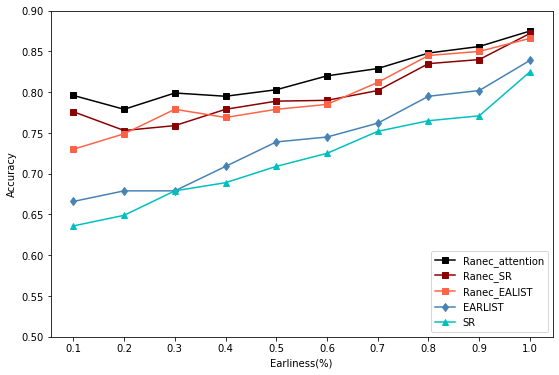

In [10]:
path_string = 'result/results/AccEarly.seqs'
with open(path_string,'rb') as f:
    data = pickle.load(f)
x=[0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

plt.figure(figsize=(9,6))
plt.plot(x, data[0],c='black',marker='s',label='Ranec_attention')
plt.plot(x, data[1],c='darkred',marker='s',label='Ranec_SR')
plt.plot(x, data[2],c='tomato',marker='s',label='Ranec_EALIST')
plt.plot(x, data[3],c='steelblue',marker='d',label='EARLIST')
plt.plot(x, data[4],c='c',marker='^',label='SR')
#plt.plot(x, data[5],c='skyblue',marker='>',label='LSTM_adaptive')
plt.xlabel('Earliness(%)')
plt.ylabel('Accuracy')
plt.xticks(x)
ax = plt.gca()
ax.set_ylim(0.5,0.9)
plt.legend(loc='lower right')
#plt.savefig('fix.jpg', dpi=300)
plt.show

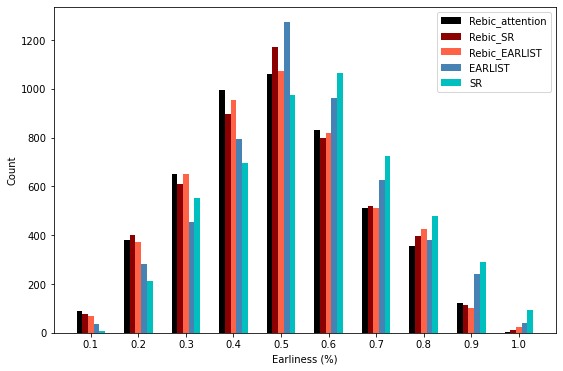

In [12]:
path_string = 'result/results/EarlyCount.seqs'
with open(path_string,'rb') as f:
    data2 = pickle.load(f)
N = 10
x=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
index = np.arange(10)
plt.figure(figsize=(9,6))
bar_width = 0.12
plt.bar(index-bar_width-bar_width, data2[0], width=0.12 , color='black',label='Rebic_attention')
plt.bar(index-bar_width, data2[1], width=0.12 , color='darkred',label='Rebic_SR')
plt.bar(index, data2[2], width=0.12 , color='tomato',label='Rebic_EARLIST')

plt.bar(index + bar_width , data2[3], width=0.12 , color='steelblue',label='EARLIST')
plt.bar(index +  bar_width+ bar_width, data2[4], width=0.12 , color='c',label='SR')
#plt.bar(index +  bar_width+bar_width+ bar_width, data2[5], width=0.12 , color='skyblue',label='LSTM_adaptive')

plt.xticks(range(10), x)
plt.legend(loc='upper right')
plt.ylabel('Count')
plt.xlabel('Earliness (%)')
#plt.savefig('fix2.jpg', dpi=300)
plt.show()

## show case

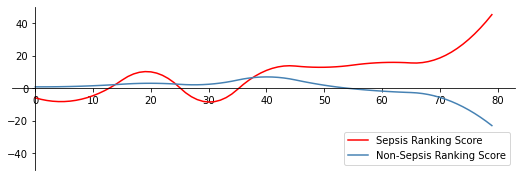

In [14]:
path_string = 'result/results/case.seqs'
with open(path_string,'rb') as f:
    data = pickle.load(f)
x2=[x for x in range(80)]
casea2=data[2]
caseranking2=data[3]
plt.figure(figsize=(9,3))
ax = plt.gca()    
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')  
ax.xaxis.set_ticks_position('bottom')   
ax.yaxis.set_ticks_position('left') 
ax.spines['bottom'].set_position(('data', 0))  
ax.spines['left'].set_position(('data', 0))
ax.set_ylim(-50,50)
plt.plot(x2, casea2,color='red',label='Sepsis Ranking Score')
plt.plot(x2, caseranking2,color='steelblue',label='Non-Sepsis Ranking Score')
plt.legend(loc='lower right')
#plt.savefig('3.jpg', dpi=300)
plt.show()

## show data distribution

In [24]:
## distribution w/o RCE loss (no ranking)

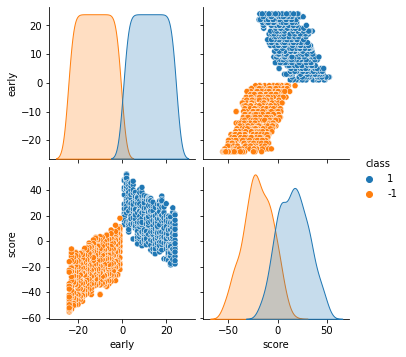

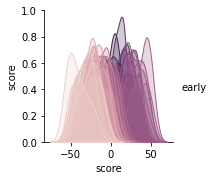

In [27]:
path_string = 'result/results/960tests_score_noranking.seqs'
with open(path_string,'rb') as f:
    data = pickle.load(f)
df = pd.DataFrame(data=data)
sns.pairplot(df,hue='class')
sns.pairplot(df,hue='early')

## distribution with RCE loss (ranking)

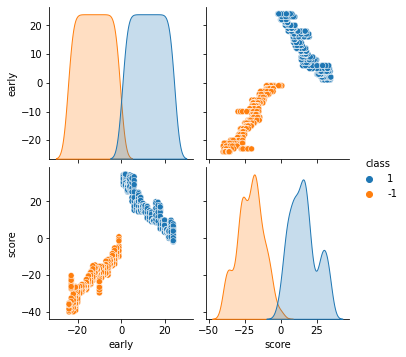

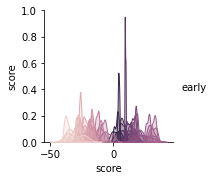

In [26]:
path_string = 'result/results/960tests_score.seqs'
with open(path_string,'rb') as f:
    data = pickle.load(f)
df = pd.DataFrame(data=data)
sns.pairplot(df,hue='class')
sns.pairplot(df,hue='early')

# 3. train new model

In [ ]:
# hyper-parameters
learning_rate=[1e-5, 2e-2]
lr_decay=2000
training_epochs=100
dropout_prob=0.25
hidden_dim=256
fc_dim=128

tf.reset_default_graph()

model.main(training_mode='train',data_path='sepsis_data/processed_data',model_path='model/save_model/REC/save_model',
     learning_rate=learning_rate,lr_decay=lr_decay,training_epochs=training_epochs,dropout_prob=dropout_prob,hidden_dim=hidden_dim,fc_dim=fc_dim)